# **Industrial Copper Modeling**

***The copper industry deals with less complex data related to sales and pricing. However, this data may suffer from issues such as skewness and noisy data, which can affect the accuracy of manual predictions. Dealing with these challenges manually can be time-consuming and may not result in optimal pricing decisions. A machine learning regression model can address these issues by utilizing advanced techniques such as data normalization, feature scaling, and outlier detection, and leveraging algorithms that are robust to skewed and noisy data.***





### **Importing Required Packages**

In [ ]:
#load packages

import pandas as pd
import matplotlib 
import numpy as np 
import scipy as sp 
import sklearn as sk 
import IPython
from IPython import display 


import random
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
import pandas as pd

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


### **Reading The Dataset**

In [ ]:
data = pd.read_excel(r"C:\Users\drang\copper_data.xlsx", na_values=np.NaN, dtype={"Selling_Price": float})

In [ ]:
data

,ID,Item_Date,Quantity_Tons,Customer,Delivery_Country,Status,Item_Type,Application,Thickness,Width,Material_Reference,Product_Reference,Delivery_Date,Selling_Price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [ ]:
df = data.copy()

data.columns

Index(['ID', 'Item_Date', 'Quantity_Tons', 'Customer', 'Delivery_Country',
       'Status', 'Item_Type', 'Application', 'Thickness', 'Width',
       'Material_Reference', 'Product_Reference', 'Delivery_Date',
       'Selling_Price'],
      dtype='object')

### **Stats and Datatypes**

In [ ]:
df.describe()

,Item_Date,Customer,Delivery_Country,Application,Thickness,Width,Product_Reference,Delivery_Date,Selling_Price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [ ]:
df.dtypes

ID                     object
Item_Date             float64
Quantity_Tons          object
Customer              float64
Delivery_Country      float64
Status                 object
Item_Type              object
Application           float64
Thickness             float64
Width                 float64
Material_Reference     object
Product_Reference       int64
Delivery_Date         float64
Selling_Price         float64
dtype: object

### **Data Preprocessing**

### ***Data Cleaning: Correcting, Completing, Creating, and Converting***

In [ ]:
print('Data columns with null values:\n', data.isnull().sum())


Data columns with null values:
 ID                        2
Item_Date                 1
Quantity_Tons             0
Customer                  1
Delivery_Country         28
Status                    2
Item_Type                 0
Application              24
Thickness                 1
Width                     0
Material_Reference    77919
Product_Reference         0
Delivery_Date             1
Selling_Price             1
dtype: int64


In [ ]:
df.nunique()

ID                    181671
Item_Date                252
Quantity_Tons         181673
Customer                1169
Delivery_Country          17
Status                     9
Item_Type                  7
Application               30
Thickness                594
Width                   1386
Material_Reference     16563
Product_Reference         33
Delivery_Date             28
Selling_Price           9795
dtype: int64

In [ ]:
df.dtypes

ID                     object
Item_Date             float64
Quantity_Tons          object
Customer              float64
Delivery_Country      float64
Status                 object
Item_Type              object
Application           float64
Thickness             float64
Width                 float64
Material_Reference     object
Product_Reference       int64
Delivery_Date         float64
Selling_Price         float64
dtype: object

In [ ]:
#treating rubbish value in material_ref with nan
#TypeError: bad operand type for unary ~: 'float'" .The ~ operator is used to invert a boolean array or mask, but it only works with boolean values
a=df['Material_Reference'].str.startswith("000000")
print(a)
b=(a==True)
df['Material_Reference'][b] = np.NaN
#print(b,df[~b])
df.head()

0         False
1          True
2         False
3         False
4         False
          ...  
181668     True
181669     True
181670     True
181671     True
181672     True
Name: Material_Reference, Length: 181673, dtype: object


,ID,Item_Date,Quantity_Tons,Customer,Delivery_Country,Status,Item_Type,Application,Thickness,Width,Material_Reference,Product_Reference,Delivery_Date,Selling_Price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [ ]:
#categorical variables
cols1 = [ 'Item_Type', 'Material_Reference', 'Product_Reference', 'Status']

#continuous variable
cols2=['Quantity_Tons', 'Customer', 'Delivery_Country', 'Application', 'Thickness', 'Width','Selling_Price']

#columns with null vals
cols3= [df.columns[df.isnull().sum()>0]]
cols3=cols3[0].drop(['ID'])
cols3

Index(['Item_Date', 'Customer', 'Delivery_Country', 'Status', 'Application',
       'Thickness', 'Material_Reference', 'Delivery_Date', 'Selling_Price'],
      dtype='object')

In [ ]:
#FILLING NULL VALUES WITH MEAN, MEDIAN AND MODE ACCORDINGLY OF CONTINUOUS, CATEGORICAL AND SKEWED VARIABLES

for i in cols3:
    print(i)
    if i == 'thickness':
        print(df[i].isnull().sum())
        df[i].fillna(df[i].median(), inplace = True)    
    elif i in cols1:  #categorical values
        print(df[i].isnull().sum())
        df[i].fillna(df[i].mode()[0], inplace = True)    
    else: 
        print(df[i].isnull().sum())
        df[i].fillna(df[i].mean(), inplace = True)
        

Item_Date
1
Customer
1
Delivery_Country
28
Status
2
Application
24
Thickness
1
Material_Reference
100645
Delivery_Date
1
Selling_Price
1


In [ ]:
df.isnull().sum()

ID                    2
Item_Date             0
Quantity_Tons         0
Customer              0
Delivery_Country      0
Status                0
Item_Type             0
Application           0
Thickness             0
Width                 0
Material_Reference    0
Product_Reference     0
Delivery_Date         0
Selling_Price         0
dtype: int64

In [ ]:
#checking all data points dtypes or any str in float dtype column

print(df.dtypes)

for i in cols2: # continuous variable
    print("feature:", i, df[i].apply(lambda x:isinstance(x, float) or isinstance(x, int)).all())
    print(df[i].dtypes)

ID                     object
Item_Date             float64
Quantity_Tons          object
Customer              float64
Delivery_Country      float64
Status                 object
Item_Type              object
Application           float64
Thickness             float64
Width                 float64
Material_Reference     object
Product_Reference       int64
Delivery_Date         float64
Selling_Price         float64
dtype: object
feature: Quantity_Tons False
object
feature: Customer True
float64
feature: Delivery_Country True
float64
feature: Application True
float64
feature: Thickness True
float64
feature: Width True
float64
feature: Selling_Price True
float64


In [ ]:
df[df['Quantity_Tons'].eq('e')==True].index

Int64Index([173086], dtype='int64')

In [ ]:
#TREATING MIXED DTYPE COLUMN 'quantity tons' with median after converting str to 0

df['Quantity_Tons'].iloc[173086] = 0
df['Quantity_Tons'].iloc[173086] = df['Quantity_Tons'].median()

data['Quantity_Tons'].iloc[173086] = 0
data['Quantity_Tons'].iloc[173086] = data['Quantity_Tons'].median()

In [ ]:
#converting object to float
df['Quantity_Tons']=df['Quantity_Tons'].astype(float)
df.drop(columns=['ID'],inplace=True)
df.dtypes

Item_Date             float64
Quantity_Tons         float64
Customer              float64
Delivery_Country      float64
Status                 object
Item_Type              object
Application           float64
Thickness             float64
Width                 float64
Material_Reference     object
Product_Reference       int64
Delivery_Date         float64
Selling_Price         float64
dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x1771a760dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x17719d228e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17720a37e80>],
 'medians': [<matplotlib.lines.Line2D at 0x177218c9400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1771b7ce0a0>],
 'means': [<matplotlib.lines.Line2D at 0x177218c9760>]}

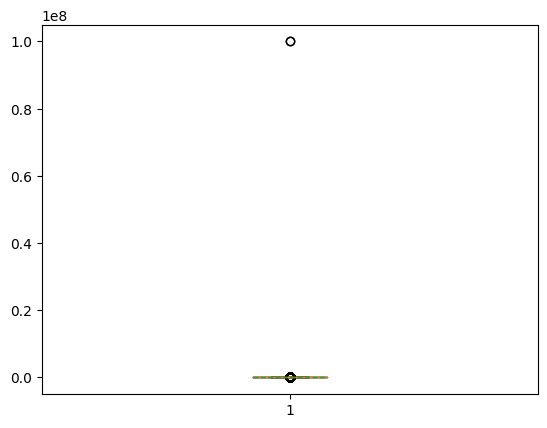

In [ ]:
plt.boxplot(df['Selling_Price'], showmeans = True, meanline = True)

In [ ]:
print(f"before transformation skewness of y = {data['Selling_Price'].skew()}" )


before transformation skewness of y = 301.38725841152456


### **Log Transformation Of Target Variable**

In [ ]:
imputer = SimpleImputer(strategy='mean')  # instantiate an Imputer object with mean strategy

import numpy as np
y = df['Selling_Price']
y= np.log(np.array(y))
print(y.shape)
y[y == -np.inf] = np.nan
y[y == np.inf] = np.nan
print(y.shape)

y = imputer.fit_transform(y.reshape(-1,1))
df['Selling_Price']=y

#FOR COMPARING BEFORE AND AFTER TRANSFORM DISTRIBUTION
df1=df.copy()
df1['Selling_Price']=data['Selling_Price']


(181673,)
(181673,)


In [ ]:

print(f"before transformation skewness of y = {data['Selling_Price'].skew()}" )
print(f"after transformation skewness of y = {df['Selling_Price'].skew()}")

before transformation skewness of y = 301.38725841152456
after transformation skewness of y = -5.334931021234355


### **Converting Categories Into Numerics**

***We can use catcodes, label encoder, onehot encoder, target encoder.***

In [ ]:
import category_encoders as ce

target_encoder = ce.TargetEncoder(cols=cols1) # categorical var

# Fit the target encoder on the training data
df= target_encoder.fit_transform(df.drop(columns=['Selling_Price']), df['Selling_Price'])
df1=target_encoder.fit_transform(df1.drop(columns=['Selling_Price']), df1['Selling_Price'])
df['Selling_Price']=y
df1['Selling_Price']=data['Selling_Price']
'''for i in cols1:
    df[i]=df[i].astype('category').cat.codes'''

"for i in cols1:\n    df[i]=df[i].astype('category').cat.codes"

In [ ]:
df

,Item_Date,Quantity_Tons,Customer,Delivery_Country,Status,Item_Type,Application,Thickness,Width,Material_Reference,Product_Reference,Delivery_Date,Selling_Price
0,20210401.0,54.151139,30156308.0,28.0,6.692695,6.643420,10.0,2.00,1500.0,6.651022,6.544028,20210701.0,6.749931
1,20210401.0,768.024839,30202938.0,25.0,6.692695,6.643420,41.0,0.80,1210.0,6.643260,6.740675,20210401.0,6.953684
2,20210401.0,386.127949,30153963.0,30.0,6.692695,6.502603,28.0,0.38,952.0,6.603904,6.554462,20210101.0,6.468211
3,20210401.0,202.411065,30349574.0,32.0,6.692695,6.613805,59.0,2.30,1317.0,6.648455,6.740675,20210101.0,6.643790
4,20210401.0,785.526262,30211560.0,28.0,6.692695,6.643420,10.0,4.00,2000.0,6.554162,6.444272,20210301.0,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,6.692695,6.643420,41.0,0.96,1220.0,6.643260,6.584020,20200701.0,6.381816
181669,20200702.0,208.086469,30200854.0,25.0,6.692695,6.643420,41.0,0.95,1500.0,6.643260,6.584020,20200701.0,6.378426
181670,20200702.0,4.235594,30200854.0,25.0,6.692695,6.643420,41.0,0.71,1250.0,6.643260,6.584020,20200701.0,6.428105
181671,20200702.0,-2000.000000,30200854.0,25.0,6.692695,6.643420,41.0,0.85,1250.0,6.643260,6.584020,20200701.0,6.398595


## **EDA_1**

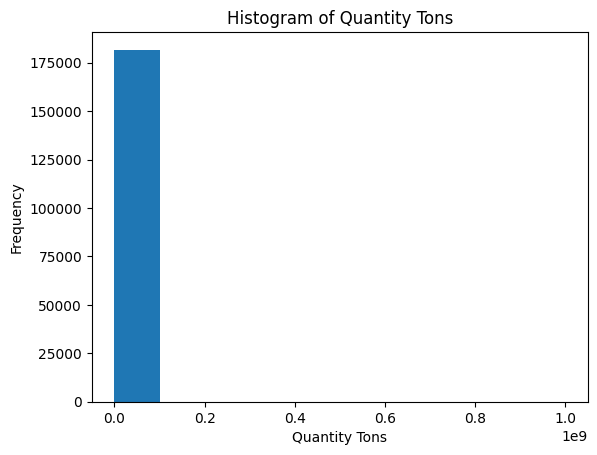

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Quantity_Tons'], bins=10)
plt.title('Histogram of Quantity Tons')
plt.xlabel('Quantity Tons')
plt.ylabel('Frequency')
plt.show()

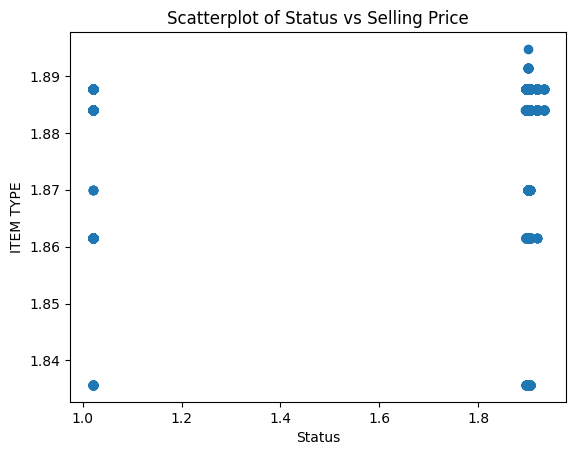

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=df['Status'], y=df['Item_Type'])
plt.title('Scatterplot of Status vs Selling Price')
plt.xlabel('Status')
plt.ylabel('ITEM TYPE')
plt.show()

[Text(0, 0, 'Draft'),
 Text(1, 0, 'Lost'),
 Text(2, 0, 'Not lost for AM'),
 Text(3, 0, 'Offerable'),
 Text(4, 0, 'Offered'),
 Text(5, 0, 'Revised'),
 Text(6, 0, 'To be approved'),
 Text(7, 0, 'Won'),
 Text(8, 0, 'Wonderful')]

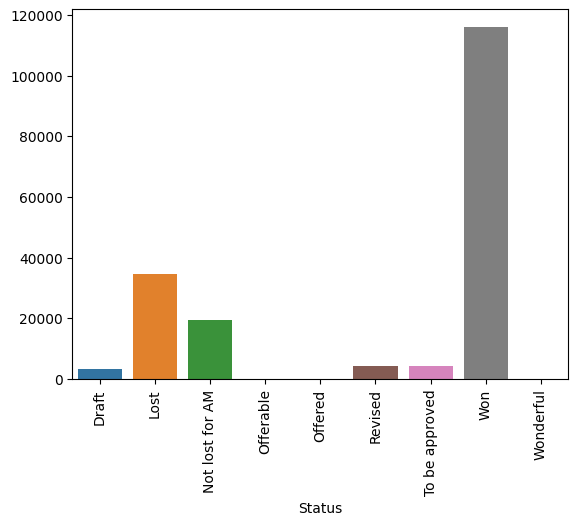

In [ ]:
# Barplot Of Status With Their Count data point instances

fig, ax = plt.subplots()
grouped_status = data.groupby(['Status'])['Status'].count()

sns.barplot(x=grouped_status.index, y=grouped_status.values, data=data, ax=ax)
ax.set_xticklabels(labels=grouped_status.index, rotation=90)

### **Before Applying Log Transform On Target**


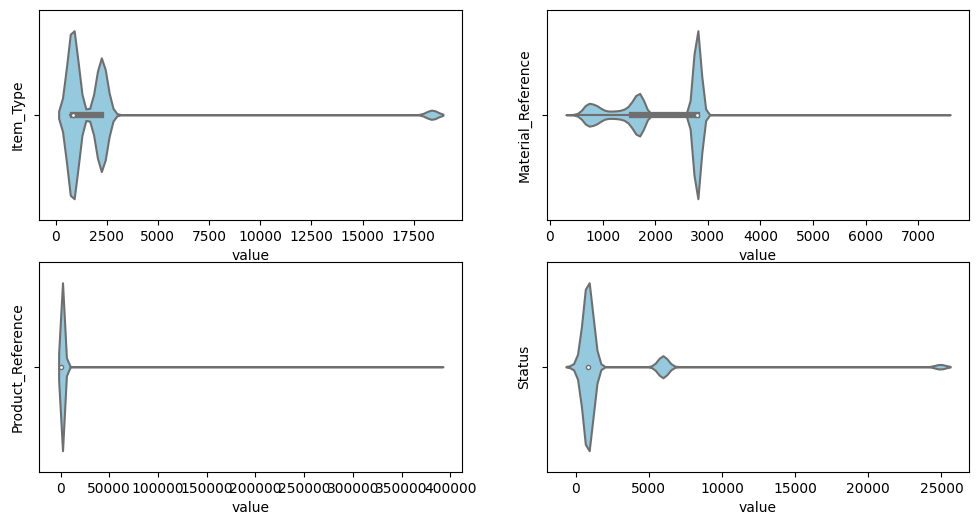

Text(0.5, 0.98, 'VIOLIN PLOT CATEGORICAL VARIABLE')

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features for the violin plot
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
ax=ax.ravel()
for i, feature in enumerate(cols1):
    sns.violinplot(data=df1, x=feature, ax=ax[i], color='skyblue')
    ax[i].set_xlabel('value')
    ax[i].set_ylabel(feature)

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.2)
plt.show()
plt.suptitle("VIOLIN PLOT CATEGORICAL VARIABLE")

### **After Applying Log Transform On Target**


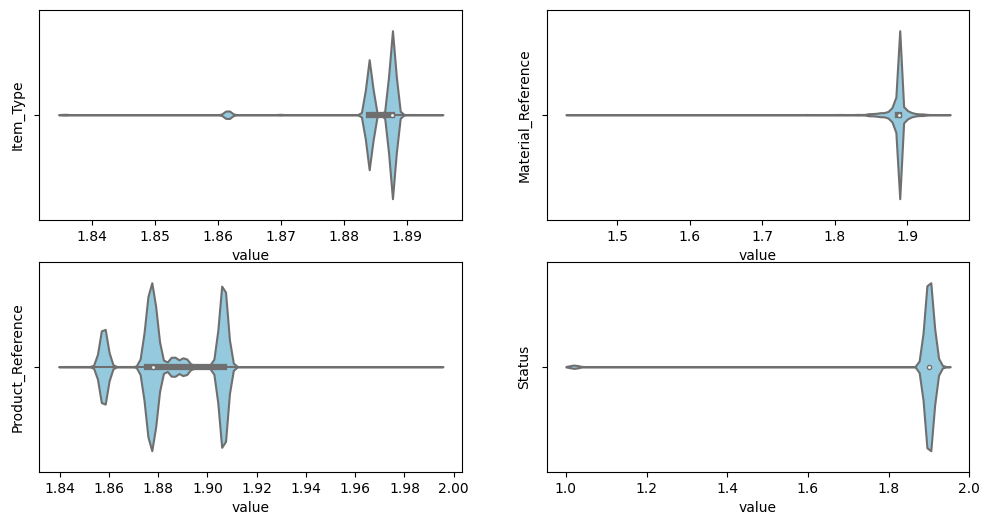

Text(0.5, 0.98, 'VIOLIN PLOT CATEGORICAL VARIABLE')

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features for the violin plot
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
ax=ax.ravel()
for i, feature in enumerate(cols1):
    sns.violinplot(data=df, x=feature, ax=ax[i], color='skyblue')
    ax[i].set_xlabel('value')
    ax[i].set_ylabel(feature)

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.2)
plt.show()
plt.suptitle("VIOLIN PLOT CATEGORICAL VARIABLE")


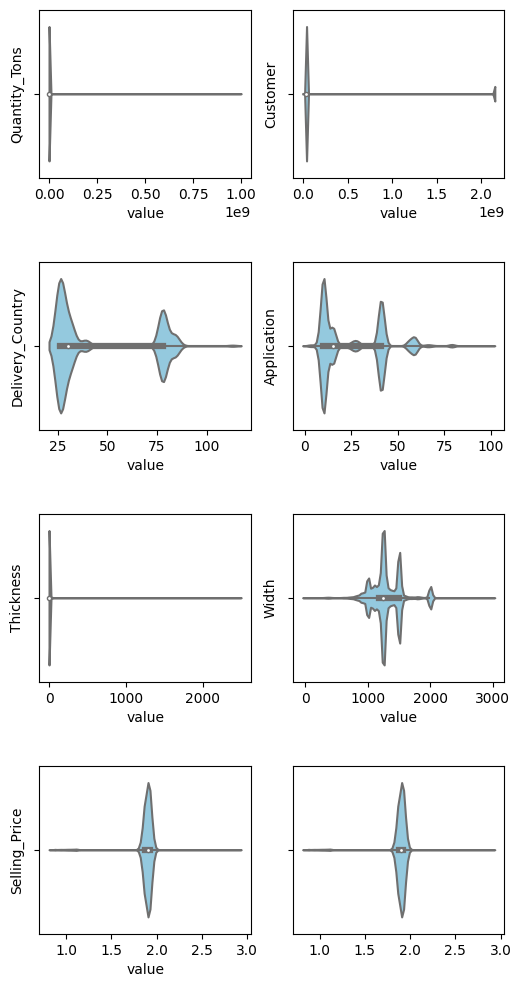

Text(0.5, 0.98, 'VIOLIN PLOT CONTINUOUS VARIABLE')

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features for the violin plot
fig, ax = plt.subplots((len(cols2)+1)//2, 2, figsize=(6, 12))
ax=ax.ravel()
for i, feature in enumerate(cols2):
    sns.violinplot(data=df, x=feature, ax=ax[i], color='skyblue')
    ax[i].set_xlabel('value')
    ax[i].set_ylabel(feature)
sns.violinplot(data=df, x=y, ax=ax[-1], color='skyblue')

# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.5)
plt.show()
plt.suptitle("VIOLIN PLOT CONTINUOUS VARIABLE")


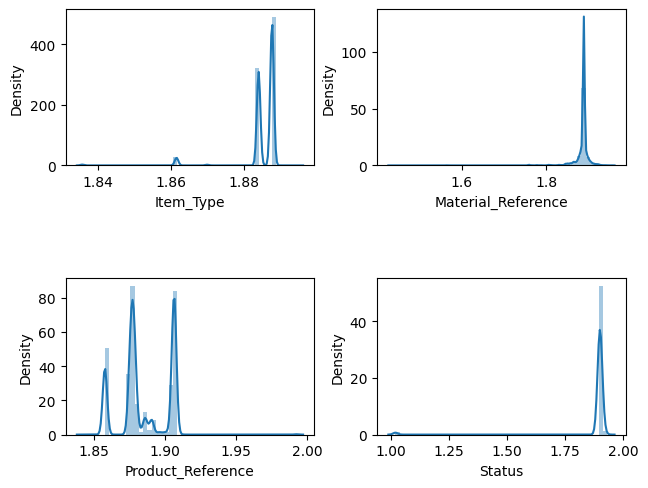

In [ ]:
#Distribution plot
fig, axs = plt.subplots(nrows=2, ncols=2)
axes = axs.flatten()
index=0
for i, j in df[cols1].items():
    sns.distplot(j, ax= axes[index])
    index+=1
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

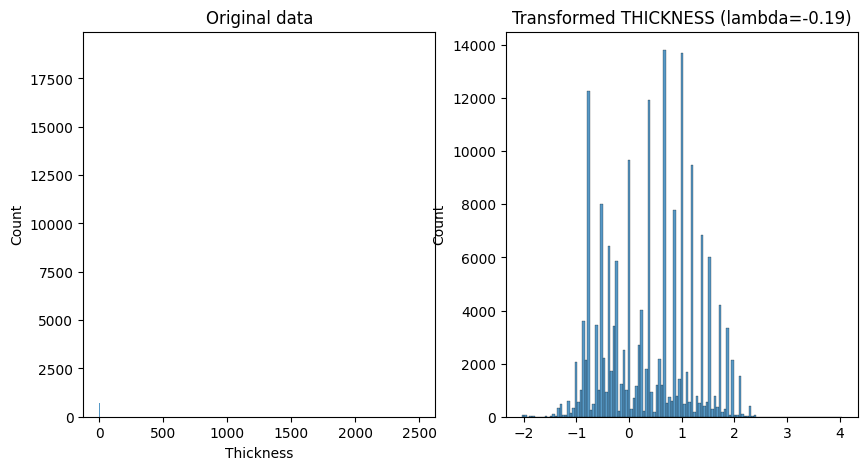

In [ ]:
from scipy import stats

# Assume x is a right-skewed continuous variable
transformed_x1, lam = stats.boxcox(df['Thickness'])

# Plot the original and transformed variables
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df['Thickness'], ax=ax[0])
sns.histplot(transformed_x1, ax=ax[1])
ax[0].set_title("Original data")
ax[1].set_title("Transformed THICKNESS (lambda={:.2f})".format(lam))
plt.show()

### **Feature Engineering**

In [ ]:
#Analytical Delivery Time Could Impact Training Regression

df['Item_Date'] = pd.to_datetime(df['Item_Date'])
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'])
df['Delivery_Time'] = (df['Delivery_Date'] - df['Item_Date']).dt.total_seconds() # Calculating Differences In Seconds

In [ ]:
#Aspect Ratio Of Copper And Total Amount In Currency

df['Aspect_Ratio'] = df['Width'] / df['Thickness']
df['Total_Amount'] = df['Quantity_Tons'] * df['Selling_Price']

In [ ]:
#Dropping Irrelevant Features

df.drop(['Item_Date', 'Delivery_Date'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

Quantity_Tons         0
Customer              0
Delivery_Country      0
Status                0
Item_Type             0
Application           0
Thickness             0
Width                 0
Material_Reference    0
Product_Reference     0
Selling_Price         0
Delivery_Time         0
Aspect_Ratio          0
Total_Amount          0
dtype: int64

In [ ]:
df['Aspect_Ratio'].fillna(df['Aspect_Ratio'].mean(), inplace=True)

### **EDA-2**

<AxesSubplot: >

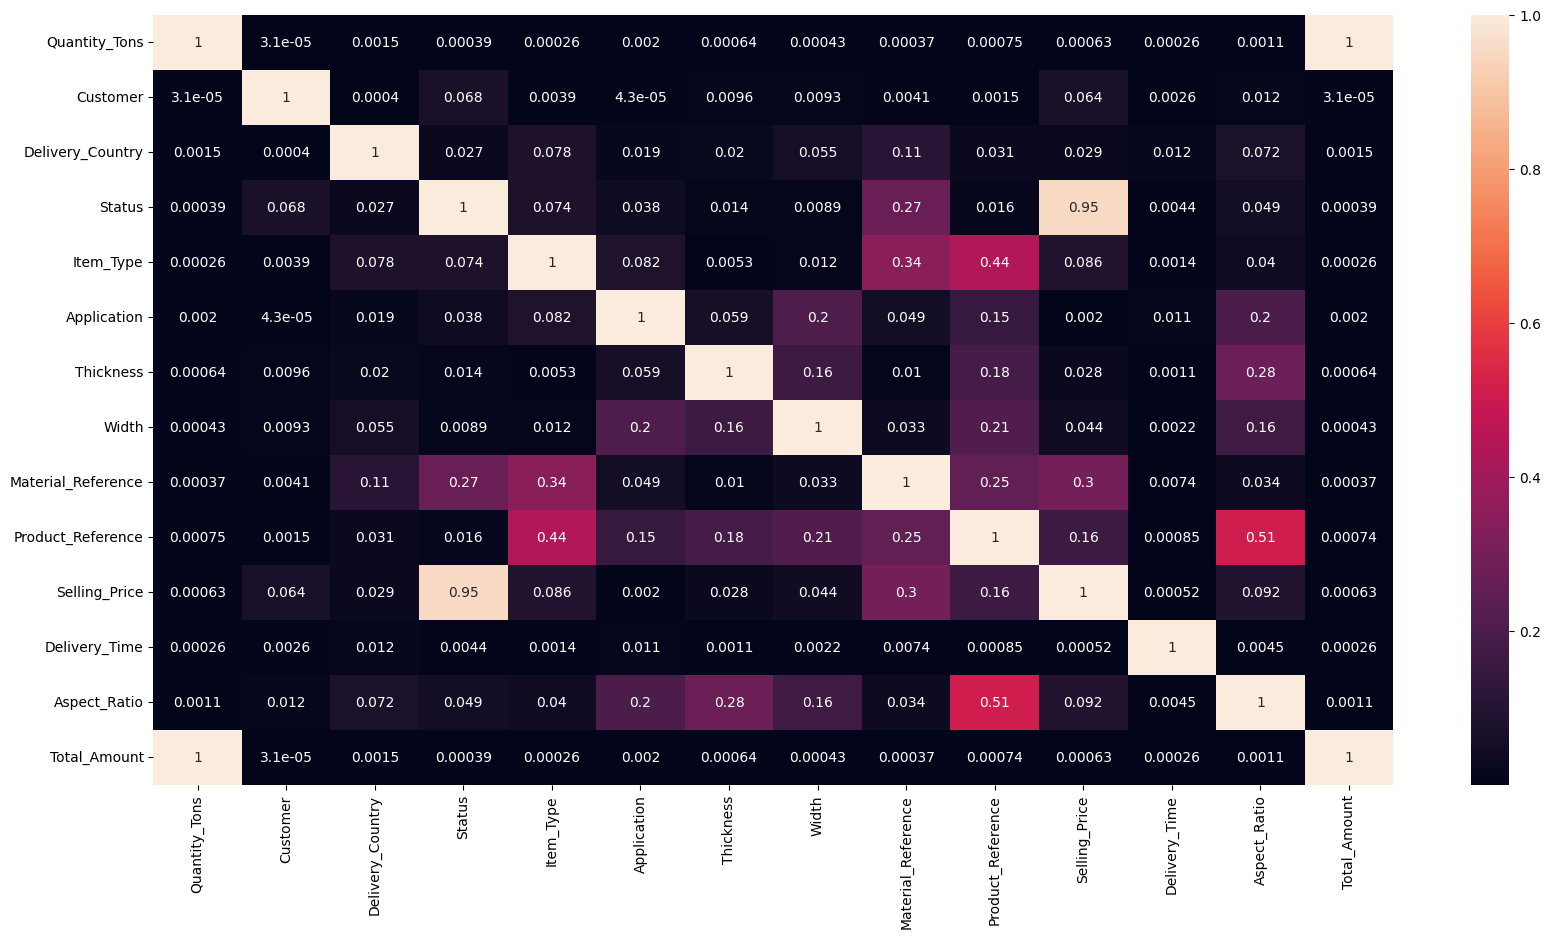

In [ ]:
#HEATMAP FOR CORRELATION BETWEEN VARIABLES

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

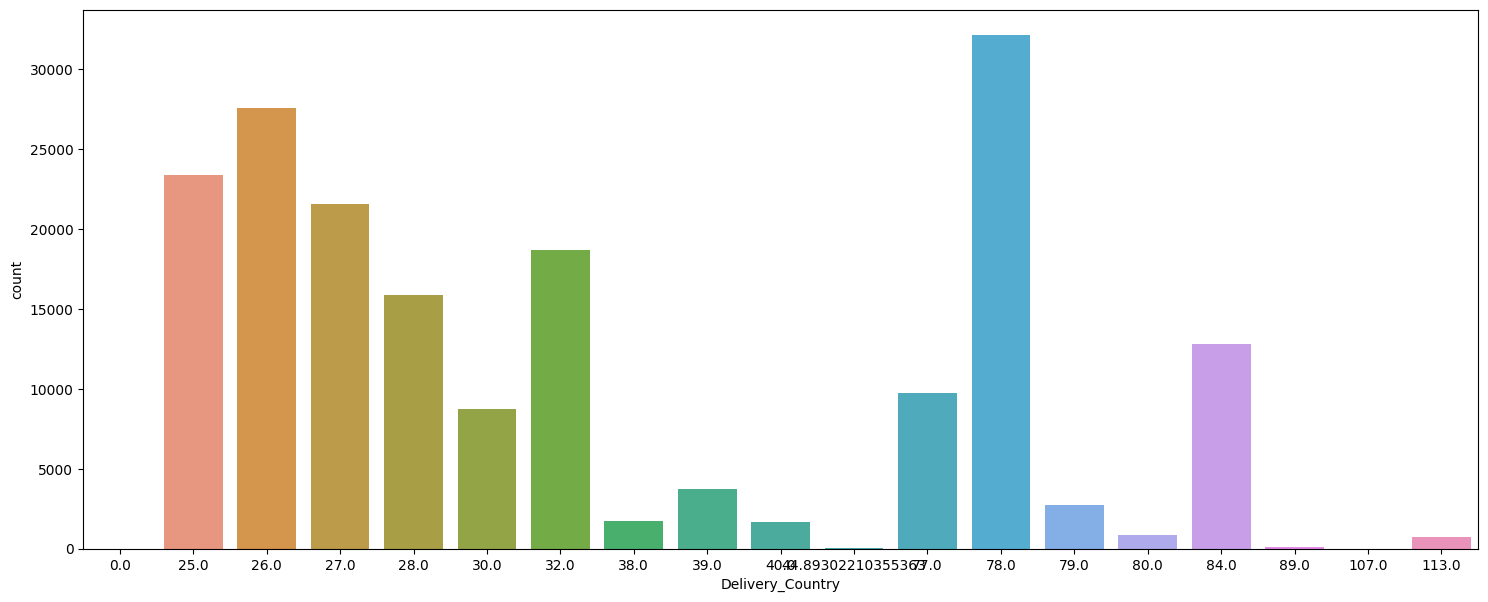

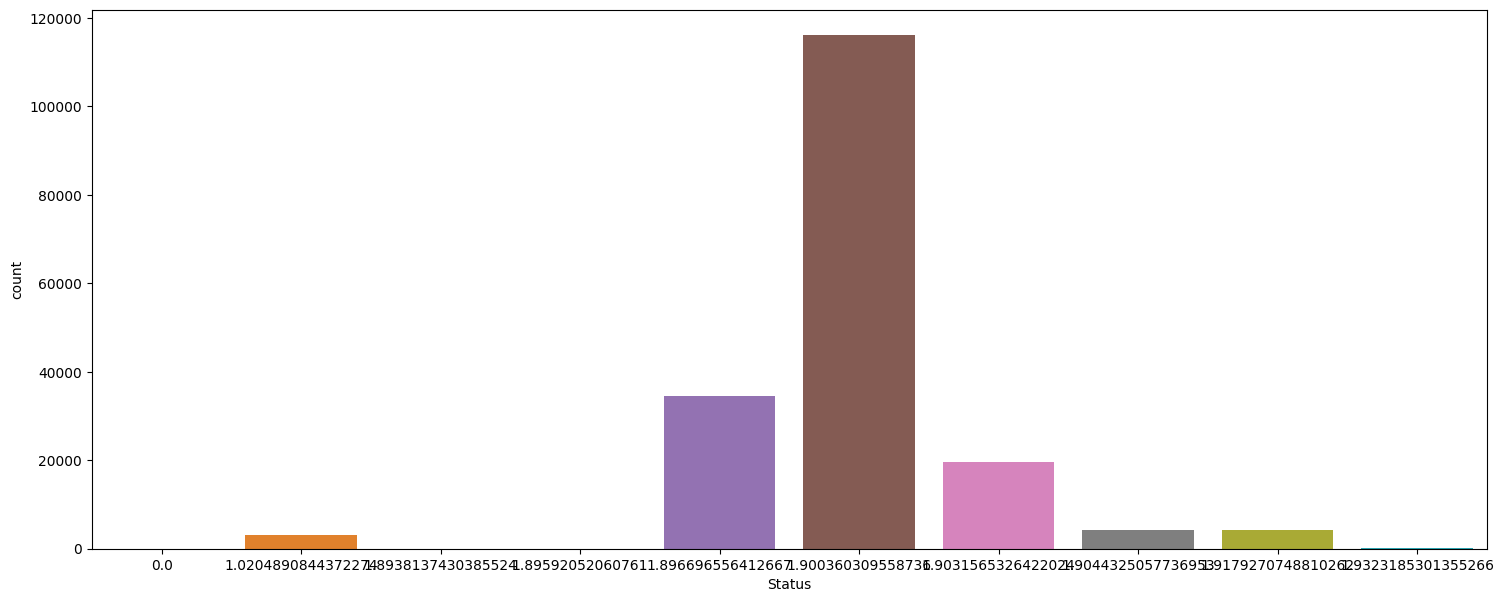

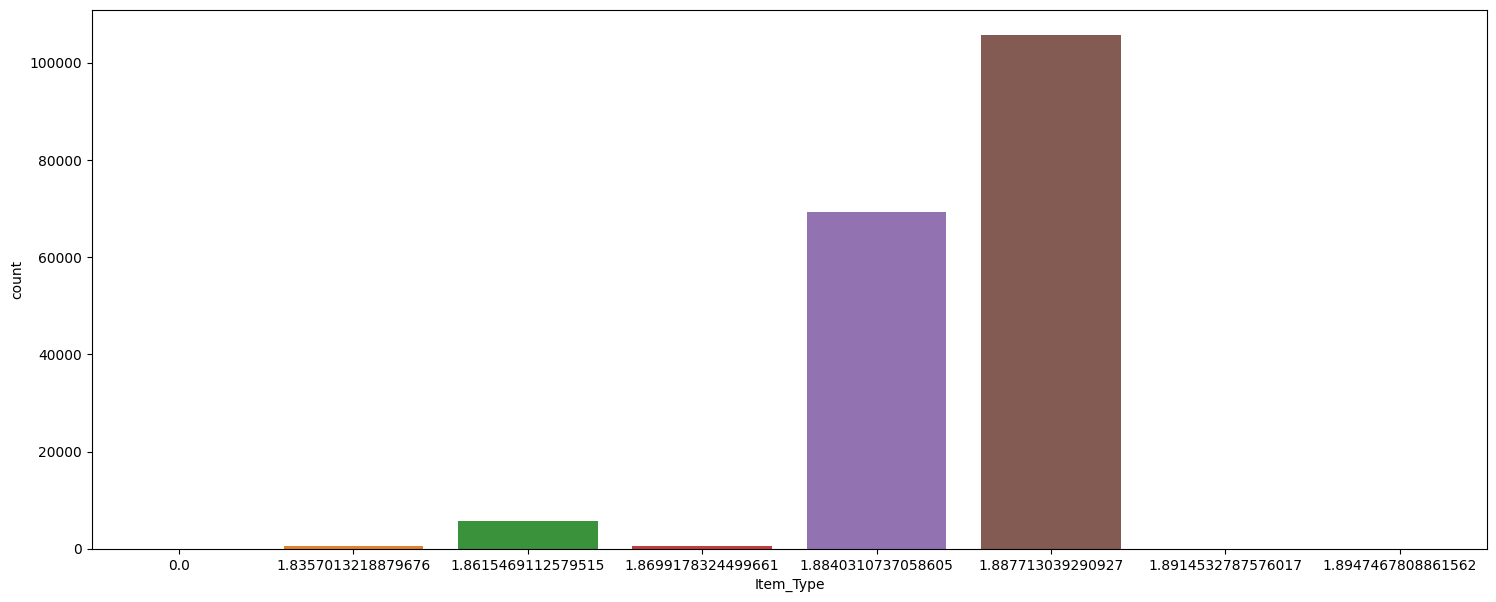

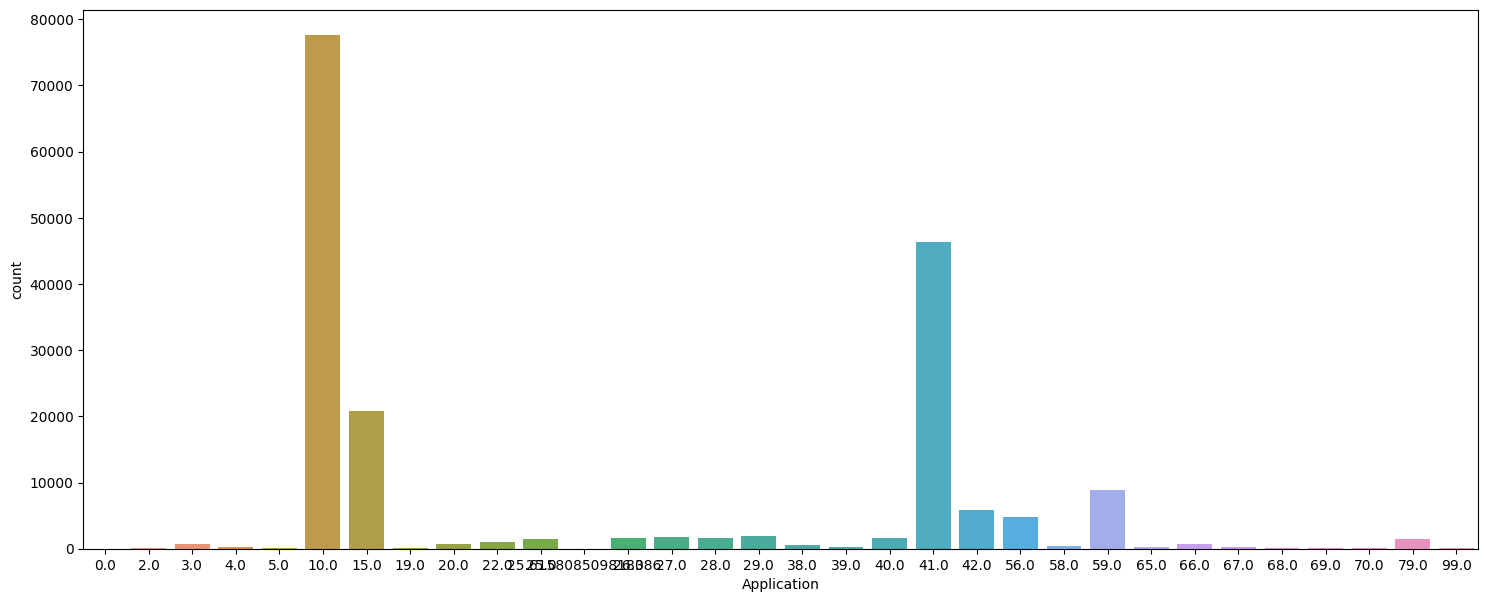

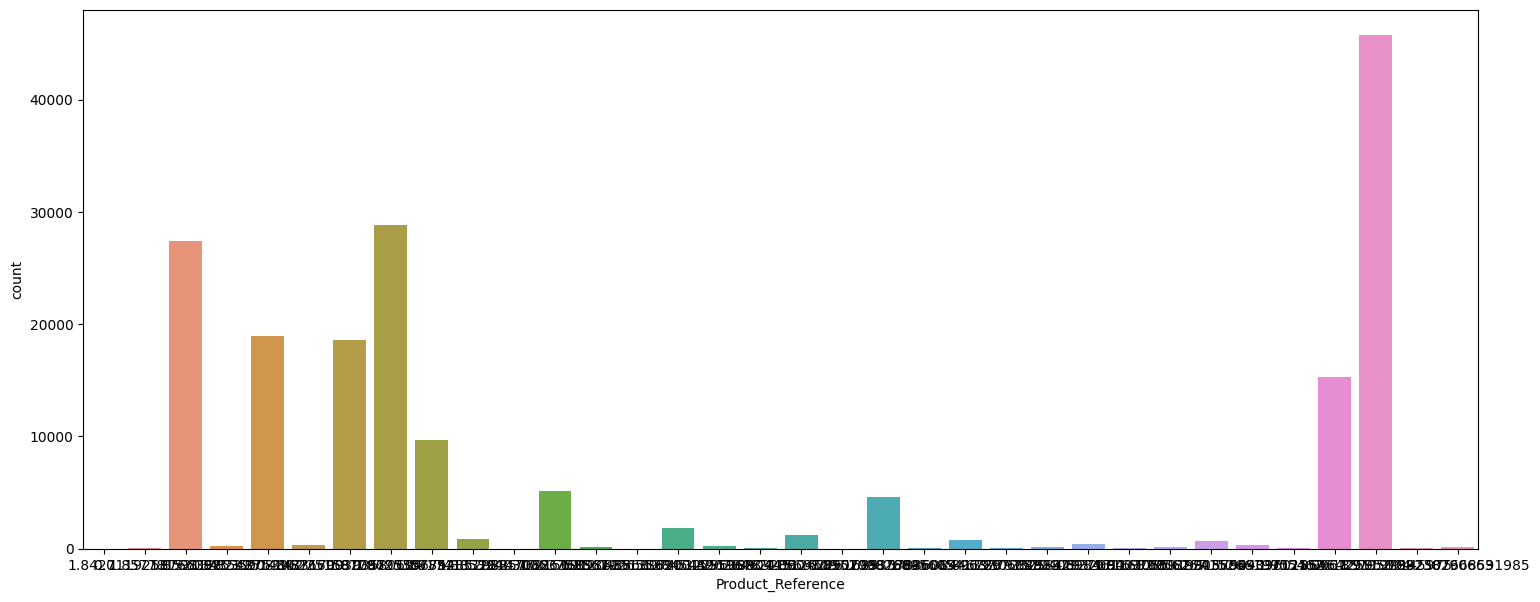

In [ ]:
for i in df.columns:
    if(df[i].nunique()<35):
        plt.figure(figsize=(18, 7))
        sns.countplot(x=df[i])
        plt.show()

In [ ]:
df.columns

Index(['Quantity_Tons', 'Customer', 'Delivery_Country', 'Status', 'Item_Type',
       'Application', 'Thickness', 'Width', 'Material_Reference',
       'Product_Reference', 'Selling_Price', 'Delivery_Time', 'Aspect_Ratio',
       'Total_Amount'],
      dtype='object')

### **Outlier Detection**

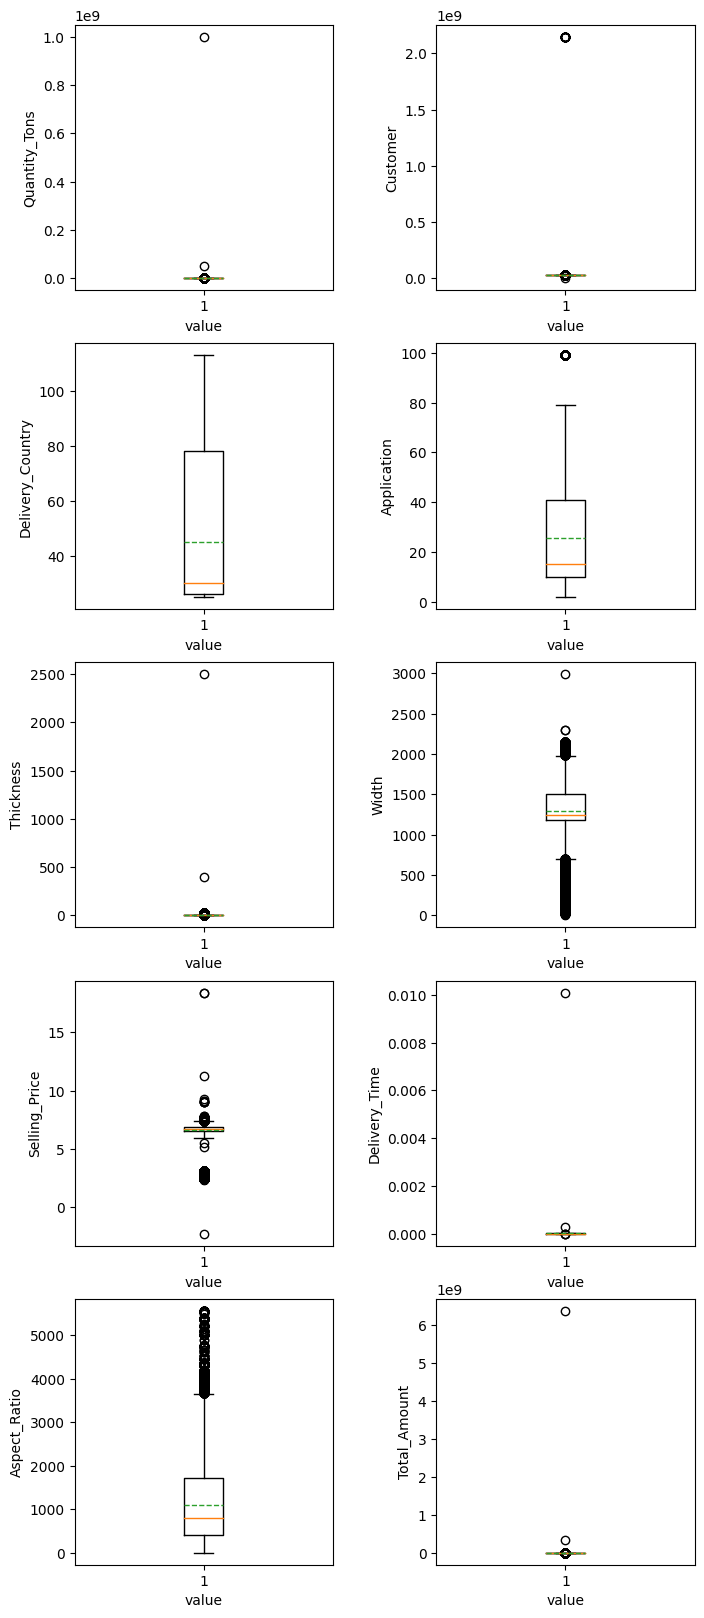

Text(0.5, 0.98, 'BOX PLOT CATEGORICAL VARIABLE')

<Figure size 640x480 with 0 Axes>

In [ ]:
#cols4 is all EDA PURPOSE continuous var

cols4= cols2 + ['Delivery_Time', 'Aspect_Ratio','Total_Amount']
fig, ax = plt.subplots((len(cols4)+1)//2, 2, figsize=(8, 20))
ax=ax.ravel()
#df['Selling_Price']=y
for i, feature in enumerate(cols4):
    ax[i].boxplot(df[feature], showmeans = True, meanline = True)
    ax[i].set_xlabel('value')
    ax[i].set_ylabel(feature)

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4)
plt.show()
plt.suptitle("BOX PLOT CATEGORICAL VARIABLE")


In [ ]:
cols1,cols2,cols3,cols4

(['Item_Type', 'Material_Reference', 'Product_Reference', 'Status'],
 ['Quantity_Tons',
  'Customer',
  'Delivery_Country',
  'Application',
  'Thickness',
  'Width',
  'Selling_Price'],
 Index(['Item_Date', 'Customer', 'Delivery_Country', 'Status', 'Application',
        'Thickness', 'Material_Reference', 'Delivery_Date', 'Selling_Price'],
       dtype='object'),
 ['Quantity_Tons',
  'Customer',
  'Delivery_Country',
  'Application',
  'Thickness',
  'Width',
  'Selling_Price',
  'Delivery_Time',
  'Aspect_Ratio',
  'Total_Amount'])

In [ ]:
#cols5 for EDA2
cols5= cols1+cols4
y = df['Selling_Price']
X = df[cols5]
# Fit the Isolation Forest model to the data
clf = IsolationForest(random_state=0, n_estimators=100, contamination=0.1)
clf.fit(df)

# Predict the outlier status of each sample
outlier_labels = clf.predict(df)

# Remove the outlier samples from the data
X_clean = X[outlier_labels == 1]
y_clean = y[outlier_labels == 1]

X_clean.shape

(163505, 14)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# create LOF object
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.5)

# fit on data
lof.fit(X_clean)

# get outlier scores
outlier_scores = lof.negative_outlier_factor_

# create mask of non-outliers
outlier_mask = outlier_scores > -2.5

# get non-outliers
X_clean1 = X_clean[outlier_mask]
y_clean1 = y_clean[outlier_mask]

In [ ]:
print(df.shape)
print(X_clean.shape)
X_clean1.shape

(181673, 14)
(163505, 14)


(158592, 14)

In [ ]:
from scipy.stats import boxcox

# Apply the Box-Cox transformation to the right-skewed X 

X_clean[X_clean['Quantity_Tons']/abs(X_clean['Quantity_Tons'])==-1]= X_clean.mean()# only positives
X_clean['Quantity_Tons'], _ = boxcox(X_clean['Quantity_Tons'])


In [ ]:
# Assume x is a right-skewed continuous variable
transformed_x2=X_clean1['Quantity_Tons']

# Plot the original and transformed variables
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df['Quantity_Tons'], ax=ax[0])
sns.histplot(transformed_x2, ax=ax[1])
ax[0].set_title("Original data")
ax[1].set_title("Transformed QUANTITY_TONS (lambda={:.2f})".format(lam))
plt.show()

<AxesSubplot: >

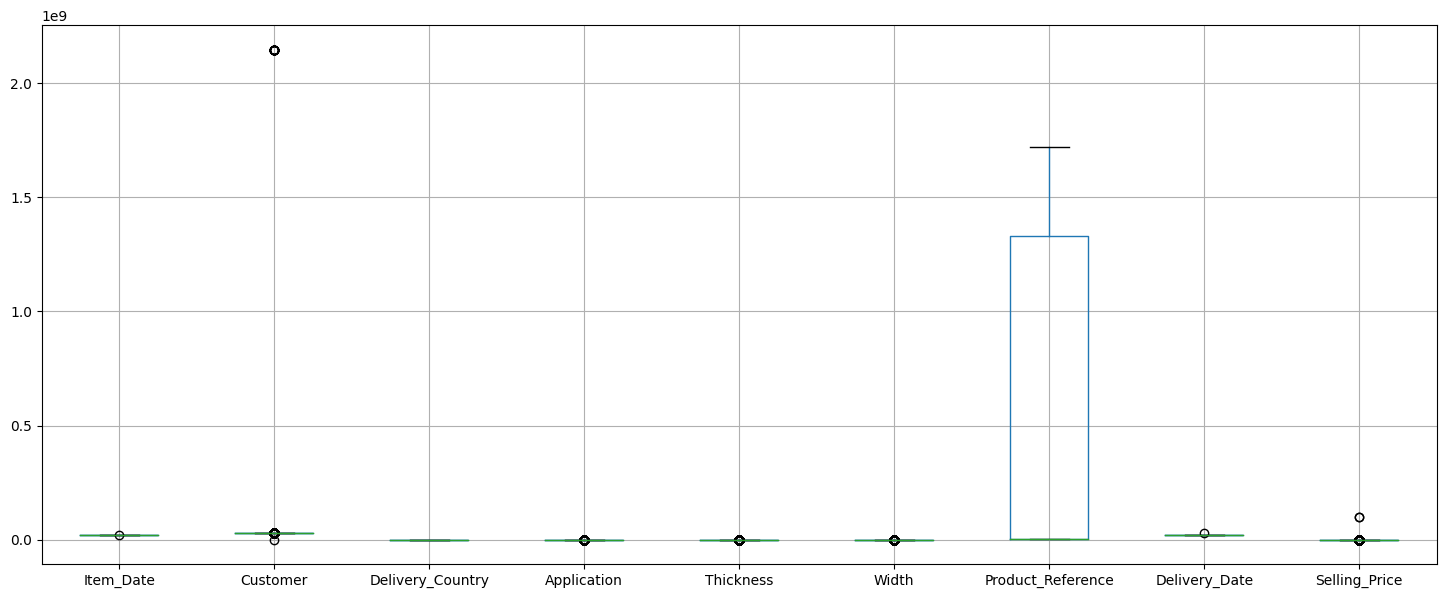

In [ ]:
#before treating outliers
data.boxplot(figsize=(18, 7))

[Text(1, 0, 'Item_Type'),
 Text(2, 0, 'Material_Reference'),
 Text(3, 0, 'Product_Reference'),
 Text(4, 0, 'Status'),
 Text(5, 0, 'Quantity_Tons'),
 Text(6, 0, 'Customer'),
 Text(7, 0, 'Delivery_Country'),
 Text(8, 0, 'Application'),
 Text(9, 0, 'Thickness'),
 Text(10, 0, 'Width'),
 Text(11, 0, 'Selling_Price'),
 Text(12, 0, 'Delivery_Time'),
 Text(13, 0, 'Aspect_Ratio'),
 Text(14, 0, 'Total_Amount')]

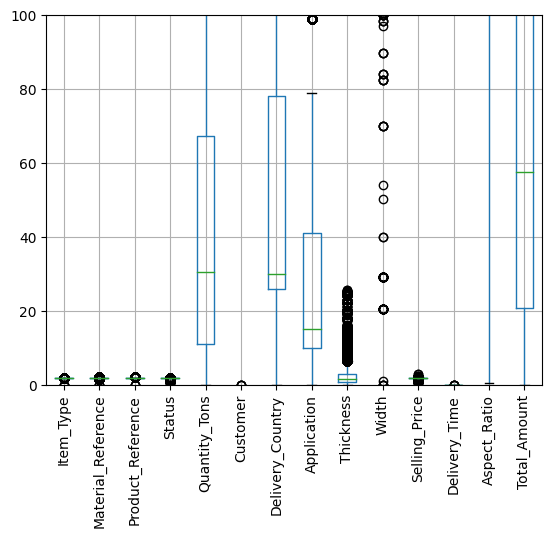

In [ ]:
#after treating outlier
fig, ax = plt.subplots()
X_clean[cols5].boxplot(figsize=(16, 9), ax=ax)

ax.set_ylim(bottom=0, top=100)
ax.set_xlim(auto=True)
ax.set_xticklabels(cols5, rotation=90)

### **Data Batch Processing**

In [ ]:
X_clean['y']= y_clean

In [ ]:
#cols6 for training
cols6= ['Item_Type',
 'Material_Reference',
 'Product_Reference',
 'Status',
 'Quantity_Tons',
 'Customer',
 'Delivery_Country',
 'Application',
 'Delivery_Time',
 'Aspect_Ratio',
 'Total_Amount']
cols6

['Item_Type',
 'Material_Reference',
 'Product_Reference',
 'Status',
 'Quantity_Tons',
 'Customer',
 'Delivery_Country',
 'Application',
 'Delivery_Time',
 'Aspect_Ratio',
 'Total_Amount']

In [ ]:
#scaling continuous feature values = removing mean and standard deviation

scaler = StandardScaler()
for i in cols6:
    X_clean[i] = scaler.fit_transform(np.array(X_clean[i]).reshape(-1,1))

In [ ]:
X_clean[cols6]

,Item_Type,Material_Reference,Product_Reference,Status,Quantity_Tons,Customer,Delivery_Country,Application,Delivery_Time,Aspect_Ratio,Total_Amount
0,0.484975,0.271590,-0.605175,-0.026749,0.498021,-0.012532,-0.684530,-0.866989,-0.096994,-0.433248,-0.032982
1,0.484975,0.126357,1.149647,-0.026749,2.982404,-0.007324,-0.808429,0.923149,-0.109004,0.482584,7.949572
3,-0.424091,0.250947,1.149647,-0.026749,1.654563,0.009053,-0.519331,1.962585,-0.121015,-0.646311,1.579067
5,0.484975,0.126357,1.149647,-0.026749,1.757149,-0.007324,-0.808429,0.923149,-0.109004,-0.321146,1.881491
7,0.484975,0.126357,1.223290,-0.026749,1.128261,0.008228,-0.519331,0.923149,-0.121015,0.820832,0.626780
...,...,...,...,...,...,...,...,...,...,...,...
181667,0.484975,0.126357,-0.453413,-0.026749,1.075410,-0.007557,-0.808429,0.923149,-0.109044,0.217343,0.513139
181668,0.484975,0.126357,-0.453413,-0.026749,1.039377,-0.007557,-0.808429,0.923149,-0.109044,0.192320,0.465453
181669,0.484975,0.126357,-0.453413,-0.026749,1.680414,-0.007557,-0.808429,0.923149,-0.109044,0.562393,1.592115
181670,0.484975,0.126357,-0.453413,-0.026749,-1.363278,-0.007557,-0.808429,0.923149,-0.109044,0.780530,-0.583132


In [ ]:
# Split dataset into X (features) and y (target variable)
X = X_clean[cols6]
y = X_clean['y']
print(f"before transformation skewness of y = {data['Selling_Price'].skew()}" )
      
#applying log transformation to target variable to reduce skewness
## since applied log transform in outlier detection 

# Split X and y into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=53)

print(f"after transformation skewness of y = {y.skew()}")

before transformation skewness of y = 301.38725841152456
after transformation skewness of y = -0.013097282937116669


In [ ]:

'''Plotly visualization .'''


import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True) 
def scatter_plot(x, y, title, xaxis, yaxis, size, c_scale):
    trace = go.Scatter(
    x = x,
    y = y,
    mode = 'markers',
    marker = dict(color = y, size = size, showscale = True, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, xaxis = dict(title = xaxis), yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)  

### **Regression Models**

In [ ]:
seed = 53

linear = LinearRegression(n_jobs = -1)
lasso = Lasso(random_state = seed)
ridge = Ridge(random_state = seed)
elnt = ElasticNet(random_state = seed)
dt = DecisionTreeRegressor(random_state = seed, max_depth=None, min_samples_leaf=1, min_samples_split=2, max_features=None)
et = ExtraTreesRegressor(
    n_estimators=100, 
    criterion='mse', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features='auto', 
    random_state=seed, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    bootstrap=False, 
    oob_score=False, 
    n_jobs=None, 
    verbose=0, 
    warm_start=False, 
    ccp_alpha=0.0, 
    max_samples=None)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, subsample=1, colsample_bytree=1, gamma=0, reg_alpha=0, reg_lambda=1, random_state = seed, n_jobs = -1)


In [ ]:
# using cross validation 

def cross_validate(model):
    neg_score = cross_val_score(model, X_train, y_train, cv = 5, n_jobs = -1, scoring = 'neg_mean_squared_error')
    score = np.round(np.sqrt(-1*neg_score), 5)
    return score.mean()

models = [linear, lasso, ridge, elnt, dt, et, xgb]
models_n = ['linear', 'lasso', 'ridge', 'elnt', 'dt', 'et', 'xgb']
training_score = []
rmse_score = []
test_score = []
c=0
for model in models:
    scr=cross_validate(model)
    c+=1
    y_true = y_test# true target values for the test set
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)# predicted target values for the test set
    
    # Calculate R2 score tscr on tests
    tr2 = model.score(X_train, y_train)
    tscr = model.score(X_test, y_test) # or  r2 = r2_score(y_true, y_pred)


    
    training_score.append(tr2)
    rmse_score.append(scr)
    test_score.append(tscr)
    
    importances= []
    print(c, model, "RMSE_score:", scr,"\t", "Train_r2_score:", tr2,"\t", "Test_R2_score:", tscr,  "\n")

    if model in [ dt, et, xgb]:
        importances = model.feature_importances_
        model.feature_names = X.columns

        for i,v in zip(model.feature_names, importances):
            print('Feature: %s, Score: %.5f' % (i,v))
        print("\n")

        
# trainscore in df
train_score = pd.DataFrame({'Training_R2': training_score, 'rmse_score': rmse_score, 'test_score': test_score})
train_score.index = ['LR', 'LSO', 'RIDGE', 'ELNT', 'DT', 'ET', 'XGB']
train_score['rmse_score'] = (train_score['rmse_score']*100).round(4)
scatter_plot(train_score.index, train_score['rmse_score'], 'Training Score (RMSE)', 'Models','% Training Score', 30, 'Rainbow')



1 LinearRegression(n_jobs=-1) RMSE_score: 0.033454 	 Train_r2_score: 0.3618652986020018 	 Test_R2_score: 0.3668356692001764 

2 Lasso(random_state=53) RMSE_score: 0.035634 	 Train_r2_score: 0.0 	 Test_R2_score: -7.379355102332674e-05 

3 Ridge(random_state=53) RMSE_score: 0.033451999999999996 	 Train_r2_score: 0.3618652985946369 	 Test_R2_score: 0.36683564053139606 

4 ElasticNet(random_state=53) RMSE_score: 0.035634 	 Train_r2_score: 0.0 	 Test_R2_score: -7.379355102332674e-05 

5 DecisionTreeRegressor(random_state=53) RMSE_score: 0.013104 	 Train_r2_score: 1.0 	 Test_R2_score: 0.8849812846925008 

Feature: Item_Type, Score: 0.01447
Feature: Material_Reference, Score: 0.06084
Feature: Product_Reference, Score: 0.36298
Feature: Status, Score: 0.02199
Feature: Quantity_Tons, Score: 0.01881
Feature: Customer, Score: 0.05697
Feature: Delivery_Country, Score: 0.07268
Feature: Application, Score: 0.01939
Feature: Delivery_Time, Score: 0.31563
Feature: Aspect_Ratio, Score: 0.03726
Feature: T

### **Evaluation Metric Scores Comparison**

In [ ]:
train_score['test_score']= train_score['test_score'].apply(lambda x : round(x,3))
train_score.sort_values(by='test_score')

,Training_R2,rmse_score,test_score
LSO,0.000000,3.5634,-0.000
ELNT,0.000000,3.5634,-0.000
LR,0.361865,3.3454,0.367
RIDGE,0.361865,3.3452,0.367
XGB,0.814949,1.5812,0.810
DT,1.000000,1.3104,0.885
ET,1.000000,0.9988,0.938


In [ ]:
model = xgb
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=53, ...)

[learning_curve] Training set sizes: [ 13420  26841  40262  53683  67104  80524  93945 107366 120787 134208]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   58.8s finished


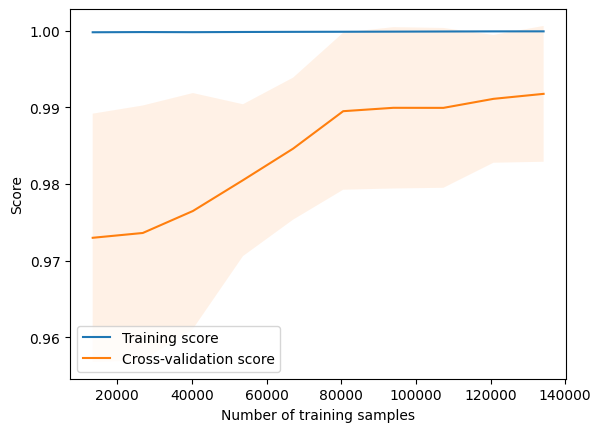

In [ ]:
#LEARNING CURVE FOR XGB REGRESSOR

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt


train_sizes, train_scores, test_scores = learning_curve(model, X_clean, y_clean, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), verbose=1)

# mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


In [ ]:
def grid_search_cv(model, params,cv=10):
    global best_params, best_score
    
    grid_search = GridSearchCV(estimator = model, param_grid = params, cv=cv , verbose = 1,
                            scoring = 'r2', n_jobs = -1)
    grid_search.fit(X_clean1[cols7], y_clean1)
    best_params = grid_search.best_params_ 
    best_score = grid_search.best_score_#np.sqrt(-1*(np.round(grid_search.best_score_, 5)))
    return best_params, best_score

In [ ]:
# hyperparameters tuning of ridge

ridge_params = {'alpha': [0.01, 0.1, 1],
              'normalize': [True, False],
              'max_iter': [100, 500, 1000],
              'solver': ['auto'],#, 'svd', 'lsqr', 'saga'],
              'tol': [0.001, 0.01, 0.1],
              'fit_intercept': [True, False],
              'random_state': [0]}
model = linear
param_grid = {'fit_intercept': [True, False],
              'normalize': [True, False]}
best_params, best_score = grid_search_cv(linear, param_grid)
ridge_best_params, ridge_best_score = best_params, best_score
print('Ridge best params:{} & best_score:{:0.5f}' .format(ridge_best_params, ridge_best_score))


Fitting 10 folds for each of 4 candidates, totalling 40 fits
Ridge best params:{'fit_intercept': True, 'normalize': False} & best_score:-0.14736


In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif, chi2

# selector instance with f_classif scoring function 
selector = SelectPercentile(f_classif, percentile=90)

selector.fit(X_clean[cols6], y_clean)

selected_features = selector.get_support()

X_selected = np.array(X_clean[cols6])[:, selected_features]
X_clean[cols6].columns[selected_features] #CUSTOMER, DELIVER_TIME REMOVED/ LEAST INFLUENCING VARS 

Index(['Item_Type', 'Material_Reference', 'Product_Reference', 'Status',
       'Quantity_Tons', 'Delivery_Country', 'Application', 'Aspect_Ratio',
       'Total_Amount'],
      dtype='object')

In [ ]:
cols6

['Item_Type',
 'Material_Reference',
 'Product_Reference',
 'Status',
 'Quantity_Tons',
 'Customer',
 'Delivery_Country',
 'Application',
 'Delivery_Time',
 'Aspect_Ratio',
 'Total_Amount']

In [ ]:
cols7=['Item_Type',
 'Status',
 'Quantity_Tons',
 'Delivery_Country',
 'Application',
 'Delivery_Time',
 'Aspect_Ratio',
 'Total_Amount']

## **Conclusion:**

***1.] Given dataset contains potential outliers in selling price(TARGET VARIABLE),so applying log transform instead box-cox transformation cause it can handle large ranges of data, and the transformation is easily reversible.***

 ***2.] It also contains right skewness in trainable parameters quantity tons, using BOX_COX transformation as it is best suited for reasonable imputation for treating outlier.***

***3.] Skewness in thickness, width are treated by making box-cox.***

***4.] Model achieves best R2 score of 0.93 with EXTRA TREE regressor, 300 with RIDGE regressor during 1st training where no outliers were removed. after outlier removal, model achieves same result of 0.95 nearer with EXTRA TREE but with RIDGE regressor 0.93 R2score.***
